In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import cartopy.feature as cfea

In [123]:
def geography():
    SUF = '.gl5'
    dtype = 'float32'
    #
    a = 2160
    b = 4320
    gl5shape = (a, b)
    #
    city_num = 1
    #
    # region
    one = 138
    two = 141
    three = 34
    four = 37
    #
    upperindex = (90-four)*12
    lowerindex = (90-three)*12
    leftindex = (180+one)*12
    rightindex = (180+two)*12
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (one, two, three, four)
    
    return a, b, upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent, city_num

In [90]:
def geography():
    dtype = 'float32'
    #
    a = 2160
    b = 4320
    gl5shape = (a, b)
    #
    # Al-Madinah(Medina)
    city_num = 393
    #
    # region
    one = 37
    two = 41
    three = 23
    four = 26
    #
    upperindex = (90-four)*12
    lowerindex = (90-three)*12
    leftindex = (180+one)*12
    rightindex = (180+two)*12
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (one, two, three, four)
    
    return a, b, upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent, city_num

In [134]:
def geography():
    dtype = 'float32'
    #
    a = 2160
    b = 4320
    gl5shape = (a, b)
    #
    # Ar-Riyadh (Riyadh)
    city_num = 61
    #
    # region
    one = 45
    two = 49
    three = 23
    four = 26
    #
    upperindex = (90-four)*12
    lowerindex = (90-three)*12
    leftindex = (180+one)*12
    rightindex = (180+two)*12
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (one, two, three, four)
    
    return a, b, upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent, city_num

In [140]:
def geography():
    dtype = 'float32'
    #
    a = 2160
    b = 4320
    gl5shape = (a, b)
    #
    # beiging
    city_num = 10
    #
    # region
    one = 115
    two = 118
    three = 39
    four = 41
    #
    upperindex = (90-four)*12
    lowerindex = (90-three)*12
    leftindex = (180+one)*12
    rightindex = (180+two)*12
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (one, two, three, four)
    
    return a, b, upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent, city_num

In [141]:
def lonlat2xy(loncnt, latcnt):
    a, b, _, __, ___, ____, _____, _____, ______ = geography()
    
    if -180 <= loncnt <=180:
        lon_middle = int(((loncnt+180)/360)*b )
        lat_middle = int(((90-latcnt)/180)*a ) 
    else:
        lon_middle = 1e20
        lat_middle = 1e20
        
    return lon_middle, lat_middle
        
def xy2lonlat(x, y):
    a, b, _, __, ___, ____, _____, _____, ______ = geography()
    
    if 0 <= x <= b:
        loncnt = (x*360/b)-180
        latcnt = 90 - (y*180)/a
    else:
        loncnt = 1e20
        latcnt = 1e20
    
    return loncnt, latcnt
    
def draw_mask(mask_temp, pop_temp, city_index, loop_num, maximum_value, best_masked_pop, un_pop, best_coverage, density_ratio):
    # cmap
    pop_vmax = 1e5
    
    # get city lonlat
    a, b, upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent, city_num = geography()

    # crop
    mask_cropped = mask_temp[upperindex:lowerindex, leftindex:rightindex]
    
    # pop
    pop_cropped = pop_temp[upperindex:lowerindex, leftindex:rightindex]
    
    # josui
    josui_path = f"/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/fcl_obs_/jyousui_20240109.csv"
    josui = pd.read_csv(josui_path)
    
    # regionalize
    josui_array = np.zeros((a, b))
    # 
    for i in range(len(josui['lon'])):
        lon_middle, lat_middle = lonlat2xy(josui['lon'][i], josui['lat'][i])
        # missing value in csv
        if lon_middle >= b or lat_middle >= a:
            continue
        else:
            josui_array[lat_middle, lon_middle] = 1
    #        
    josui_cropped = josui_array[upperindex:lowerindex, leftindex:rightindex]
    josui_masked = np.ma.masked_where(josui_cropped==0, josui_cropped)

    # extent
    projection = ccrs.PlateCarree()

    # figure
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    ax.set_extent(img_extent)
    ax.gridlines(draw_labels=True)
    im = ax.imshow(pop_cropped,
                   origin='upper',extent=img_extent, transform=projection, cmap='gist_heat_r'
                   #vmin=0, vmax=pop_vmax
                  )
    #
    seethrough = np.ma.masked_where(mask_cropped == 0, mask_cropped)
    seethrough[-1, -1] = 0
    im2 = ax.imshow(seethrough,
                    origin='upper',extent=img_extent, transform=projection, cmap='gray_r'
                   )
    # 
    josui_cmap = plt.cm.colors.ListedColormap(['white', 'blue'])
    im3 = ax.imshow(josui_masked, 
                    origin='upper', cmap=josui_cmap, vmin=0, vmax=1, extent=img_extent,  transform=projection, zorder=3)
    im4 = ax.scatter(josui['lon'], josui['lat'], color='green', s=5, zorder=4)
    
    # save figure
    gif_path = f'./gifs/{loop_num:08}.jpg'
    plt.title(f"population density: {maximum_value} [/km2]\ndensity ratio: {density_ratio}[%]\ncoverage: {int(best_masked_pop)}/{int(un_pop)}[person]\ncoverage rate: {np.round(best_coverage*100,2)}[%]")
    #plt.savefig(gif_path)
    fig.colorbar(im, ax=ax, orientation='horizontal')
    plt.show()

In [142]:
def explore_citymask(index):

    #-----------------------------------------------
    # Initialization
    #-----------------------------------------------

    # pop data
    POP='gpw4'

    # city center modification
    modify_flag = True
    
    # map data
    MAP='CAMA'

    # explore grid radius
    radius_max = 12

    # search radius (1grid in 0.5degree)
    circle = 3

    # lower limitation of population density
    # if lowlim>=1e-9, tokyo mask looks like doi & kato's result
    lowlim = 100

    # lowest rate
    lowrat = 10.0

    # downtown rate
    downtown_rate = 0.1

    # grid sum
    grdlim = 3

    # initial grid threshold
    threshold = 100

    # shape
    lat_shape = 2160
    lon_shape = 4320

    # date type
    dtype= 'float32'

    # h08 directory
    h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'

    # initialize variables
    best_coverage = float('inf')
    best_mask = None
    best_masked_pop = None

    #-----------------------------------------------
    # load true data (UN city list) unit=[1000person]
    #-----------------------------------------------

    # true population and city name
    un_pop_list = []
    name_list = []

    # load data
    city_path = f'{h08dir}/dat/cty_lst_/{POP}/WUP2018_300k_2010.txt'
    for l in open(city_path).readlines():
        data = l[:].split('\t')
        data = [item.strip() for item in data]
        un_pop_list.append(float(data[3]))
        name_list.append(data[4])

    # get true UN city population
    un_pop = un_pop_list[index-1]*1000

    # get city name
    city_name = name_list[index-1]

    #-----------------------------------------------
    #  Get area(m2)
    #-----------------------------------------------

    area_path = f'{h08dir}/dat/lnd_ara_/lndara.{MAP}.gl5'
    area = np.fromfile(area_path, dtype=dtype).reshape(lat_shape, lon_shape)

    #-----------------------------------------------
    # load gwp population data
    #-----------------------------------------------

    # population data(GWP4 2000)
    pop_path = f'{h08dir}/dat/pop_tot_/GPW4ag__20100000.gl5'
    gwp_pop = np.fromfile(pop_path, dtype=dtype).reshape(lat_shape, lon_shape)

    # population density (person/km2)
    gwp_pop_density = (gwp_pop / (area / 10**6))

    #-----------------------------------------------
    # load city_center coordinate
    #-----------------------------------------------

    if modify_flag is True:
        center_path = f'{h08dir}/dat/cty_cnt_/{POP}/city_{index:08d}.gl5'
    else:
        center_path = f'{h08dir}/dat/cty_cnt_/{POP}/modified/city_{index:08d}.gl5'
    location = np.fromfile(center_path, dtype=dtype).reshape(lat_shape,lon_shape)
    x = np.where(location==1)[0]
    y = np.where(location==1)[1]
    x = x[0]
    y = y[0]
    
    #-----------------------------------------------
    # check city center
    #-----------------------------------------------

    # original city center
    org_cnt = gwp_pop_density[x, y]

    if modify_flag is True:
        # number of replacement
        replaced_num = 0
        print(f"cityindex {index}")
        org_lon, org_lat = xy2lonlat(y, x)
        print(f'original center [x, y] = [{org_lon, org_lat}]')
        print(f'org_cnt: {org_cnt}')
        
        for a_cnt in range(x-circle, x+circle+1):
            for b_cnt in range(y-circle, y+circle+1):
                candidate = gwp_pop_density[a_cnt, b_cnt]
                if candidate >= org_cnt:
                    org_cnt = candidate
                    x = a_cnt
                    y = b_cnt
                    replaced_num += 1
        new_lon, new_lat = xy2lonlat(y, x)
        print(f'replaced center [x, y] = [{new_lon, new_lat}]')
        print(f"rpl_cnt: {gwp_pop_density[x, y]}")

    #-----------------------------------------------
    #  Initialization of mask array
    #-----------------------------------------------

    # mask array for saving
    mask = np.zeros((lat_shape,lon_shape), dtype=dtype)
    mask[x, y] = 1

    #-----------------------------------------------
    #  Explore start
    #-----------------------------------------------

    # stop flag
    new_mask_added = True
    coverage_flag = True

    # city center
    best_mask = mask
    grid_num = np.sum(best_mask)
    best_masked_pop = np.sum(gwp_pop*mask)
    best_coverage = float(best_masked_pop / un_pop)

    # monitor density ration
    init_masked_dns = np.sum(gwp_pop_density[x, y])
    previous_density = np.sum(gwp_pop_density[x, y])

    # initial grid threshold
    if gwp_pop_density[x, y] <= threshold:
        print("/// stop ///")
        print("/// stop ///")
        print("/// stop ///")
        print("/// stop ///")
        print(f"initial density {gwp_pop_density[x, y]} less than threshold {threshold}")
        print("/// stop ///")
        print("/// stop ///")
        print("/// stop ///")
        print("/// stop ///")
        new_mask_added = False
        coverage_flag = False
        loop_num = 1
        next_density = gwp_pop_density[x, y]
        density_ratio = 0
        draw_mask(best_mask, gwp_pop_density, index, loop_num, np.round(next_density), best_masked_pop, un_pop, best_coverage, density_ratio)

    # loop start
    loop_num = 0
    while new_mask_added:

        ### make search list
        search_lst = []
        new_mask_added = False
        for a in range(max(0, x - radius_max), min(x + radius_max + 1, lat_shape)):
            for b in range(max(0, y - radius_max), min(y + radius_max + 1, lon_shape)):
                if mask[a, b] == 1:
                    # explore surrounded 8 grids
                    for dx, dy in [(-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, 1)]:
                        i, j = a + dx, b + dy
                        # not explored yet
                        if mask[i, j] == 0:
                            # within grid range
                            if 0 <= i < lat_shape and 0<= j < lon_shape:
                                search_lst.append([gwp_pop_density[i, j], i, j])

        ### add searched grid
        # empty check
        if not search_lst:

            print('search_lst is empty')
            new_mask_added = False
            coverage_flag = False
            
        # get largest grid
        else:
            
            sorted_search = sorted(search_lst, key=lambda x: x[0], reverse=True)
            largest = sorted_search[0]
            next_density = gwp_pop_density[largest[1], largest[2]]
            density_ratio = int((next_density/init_masked_dns)*100)
            
            # if largest grid value is too small, stop exploring
            if next_density <= lowlim:
                print("/// stop ///")
                print("/// stop ///")
                print("/// stop ///")
                print("/// stop ///")
                print(f"largest density {gwp_pop_density[largest[1], largest[2]]} smaller than lowlim {lowlim}")
                print([gwp_pop_density[t[1], t[2]]for t in sorted_search])
                print("/// stop ///")
                print("/// stop ///")
                print("/// stop ///")
                print("/// stop ///")
                new_mask_added = False
                coverage_flag = False
                
            elif next_density > previous_density and best_coverage > downtown_rate and grid_num >= grdlim:
                print("/// stop ///")
                print("/// stop ///")
                print("/// stop ///")
                print("/// stop ///")
                print(f"latest density {next_density} bigger than previous density {previous_density}")
                print("/// stop ///")
                print("/// stop ///")
                print("/// stop ///")
                print("/// stop ///")
                new_mask_added = False
                coverage_flag = False
                
            elif density_ratio < lowrat:
                print("/// stop ///")
                print("/// stop ///")
                print("/// stop ///")
                print("/// stop ///")
                print(f"latest density {next_density} less than 1/{lowrat} of initial density {init_masked_dns}")
                print("/// stop ///")
                print("/// stop ///")
                print("/// stop ///")
                print("/// stop ///")
                new_mask_added = False
                coverage_flag = False
                
        # stop flag
        if coverage_flag is True:
                new_mask_added = True

                # evaluate coverage
                gwp_masked_pop = np.sum(mask * gwp_pop)
                coverage = float(gwp_masked_pop / un_pop)

                # stop exploring
                if coverage >= 1.0:
                    new_mask_added = False
                    coverage_flag = False

                # judge
                judge_value = abs(1 - coverage)
                best_value = abs(1 - best_coverage)
                
                # update
                if judge_value < best_value:
                    best_coverage = coverage
                    best_mask = mask
                    best_masked_pop = gwp_masked_pop
                    grid_num = np.sum(best_mask)
                    previous_density = gwp_pop_density[largest[1], largest[2]]
        
        # search_lst is colored
        for cand in search_lst:
            mask[cand[1], cand[2]] = 0.1
        # for drawing
        mask[largest[1], largest[2]] = 0.3
        
        # draw
        # cand = 0.3
        # largest = 0.6
        # citymask = 1
        density_ratio = int((next_density/init_masked_dns)*100)
        draw_mask(best_mask, gwp_pop_density, index, loop_num, np.round(next_density), best_masked_pop, un_pop, best_coverage, density_ratio)
        #new_mask_added = False # this should be removed in the future
        #coverage_flag = False # this should be removed in the future
        
        # reset
        mask[mask == 0.1] = 0
        mask[mask == 0.3] = 1
        # loop count
        loop_num += 1

        #-----------------------------------------------
        # Output result
        #-----------------------------------------------

        print('#########################################')
        print(
              f"explored_pop {best_masked_pop}\n" \
              f"true_pop {un_pop}\n" \
              f"coverage {best_coverage}\n" \
              f"city_mask {grid_num}\n" \
              f"{city_name}"
              )
        print('#########################################')

cityindex 10
original center [x, y] = [(116.33333333333331, 39.916666666666664)]
org_cnt: 18905.667209525396
replaced center [x, y] = [(116.33333333333331, 40.0)]
rpl_cnt: 24028.50301623272


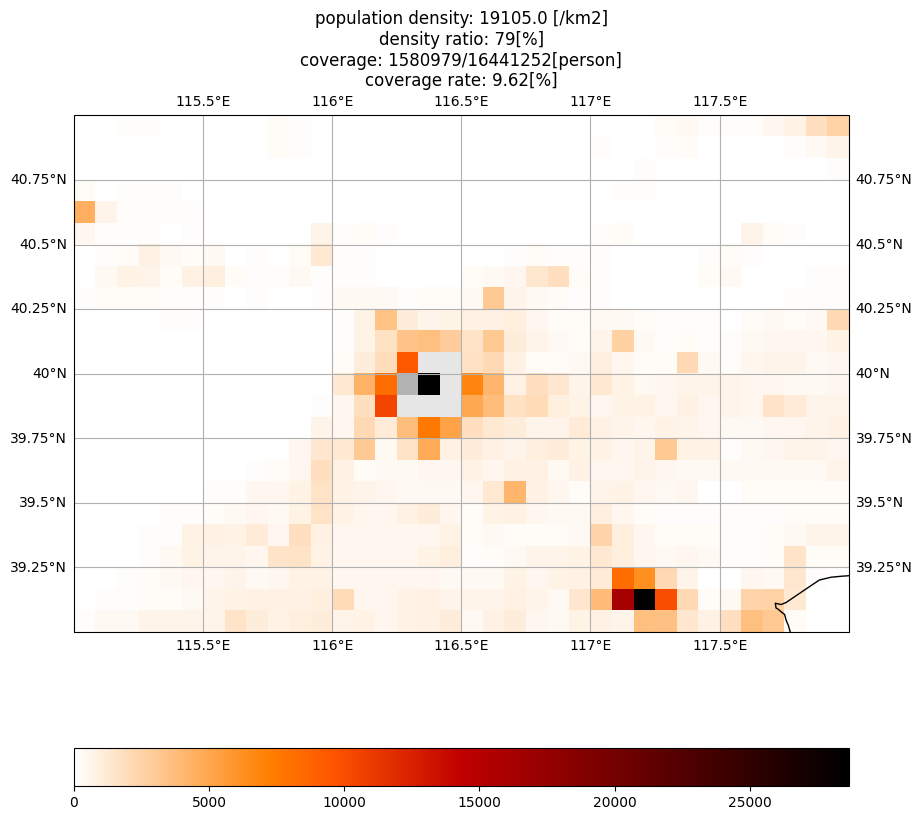

#########################################
explored_pop 1580979.0
true_pop 16441252.0
coverage 0.09615928276021801
city_mask 1.0
Beijing
#########################################


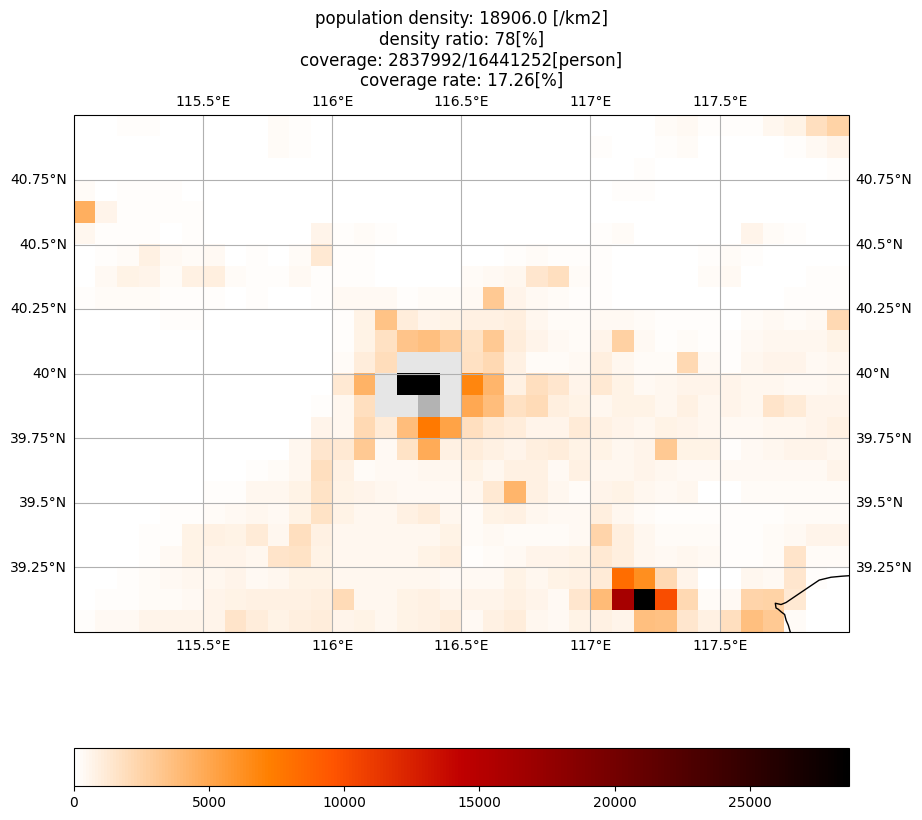

#########################################
explored_pop 2837992.5
true_pop 16441252.0
coverage 0.17261413546851542
city_mask 2.0
Beijing
#########################################


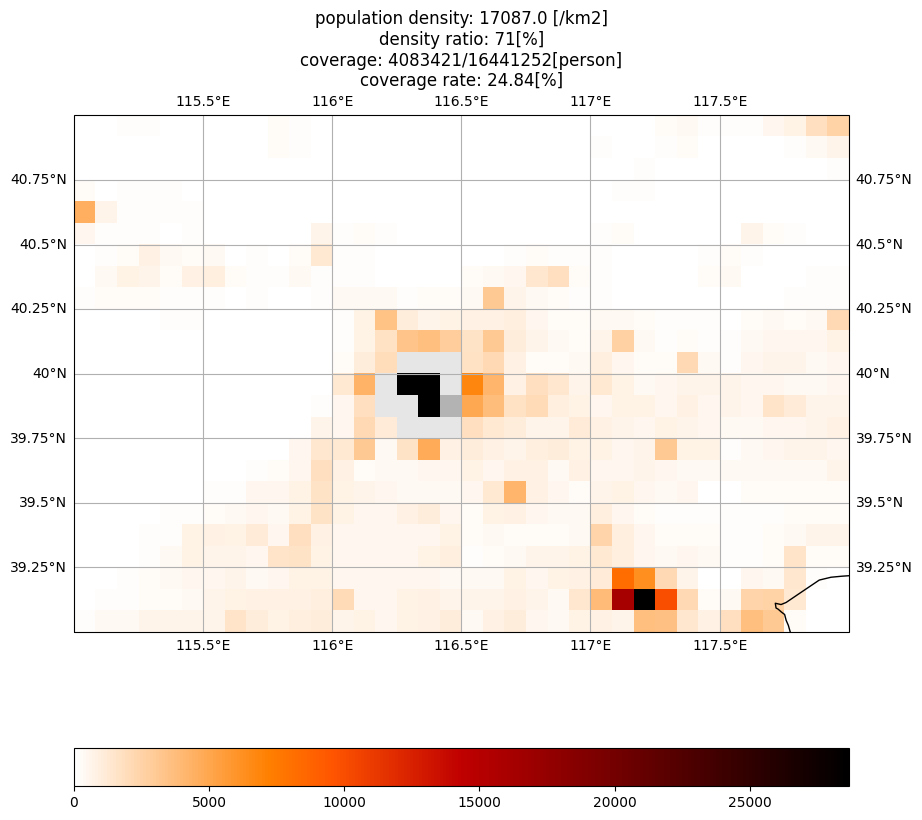

#########################################
explored_pop 4083421.25
true_pop 16441252.0
coverage 0.24836437334577682
city_mask 3.0
Beijing
#########################################


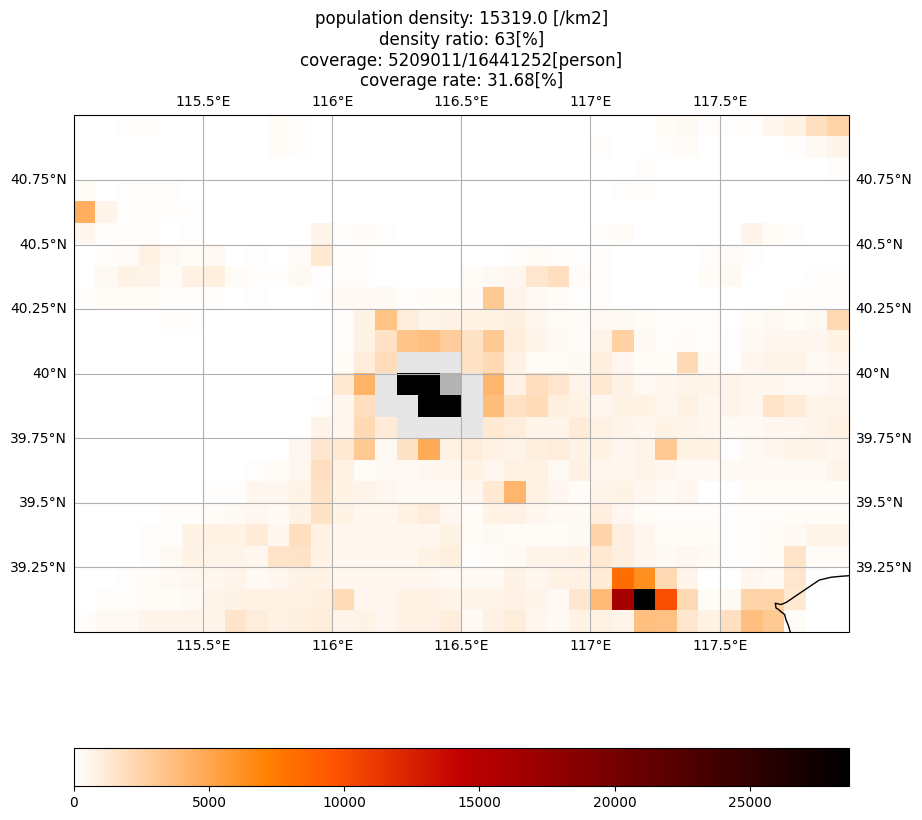

#########################################
explored_pop 5209011.5
true_pop 16441252.0
coverage 0.3168257198417736
city_mask 4.0
Beijing
#########################################


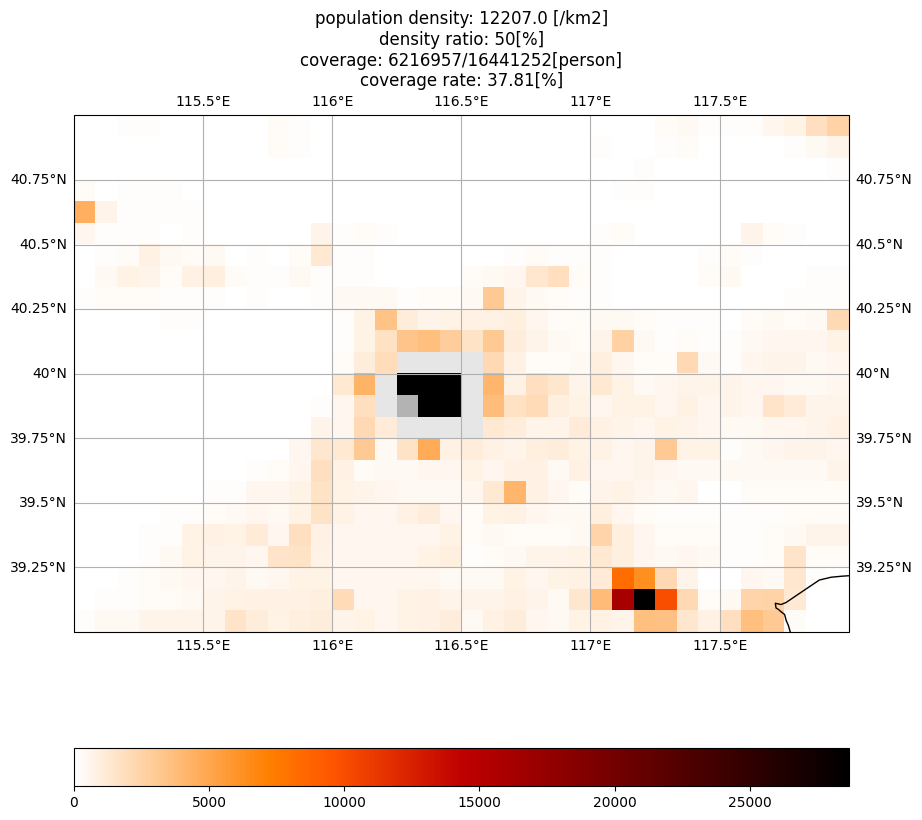

#########################################
explored_pop 6216957.5
true_pop 16441252.0
coverage 0.3781316349874085
city_mask 5.0
Beijing
#########################################


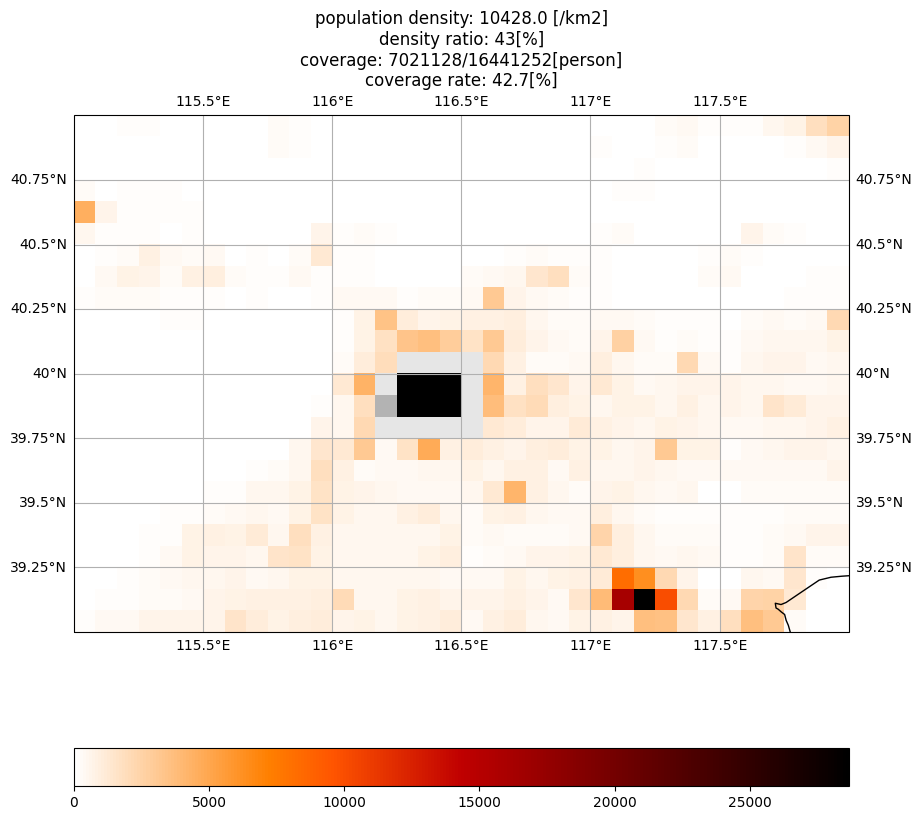

#########################################
explored_pop 7021128.0
true_pop 16441252.0
coverage 0.4270433906128317
city_mask 6.0
Beijing
#########################################


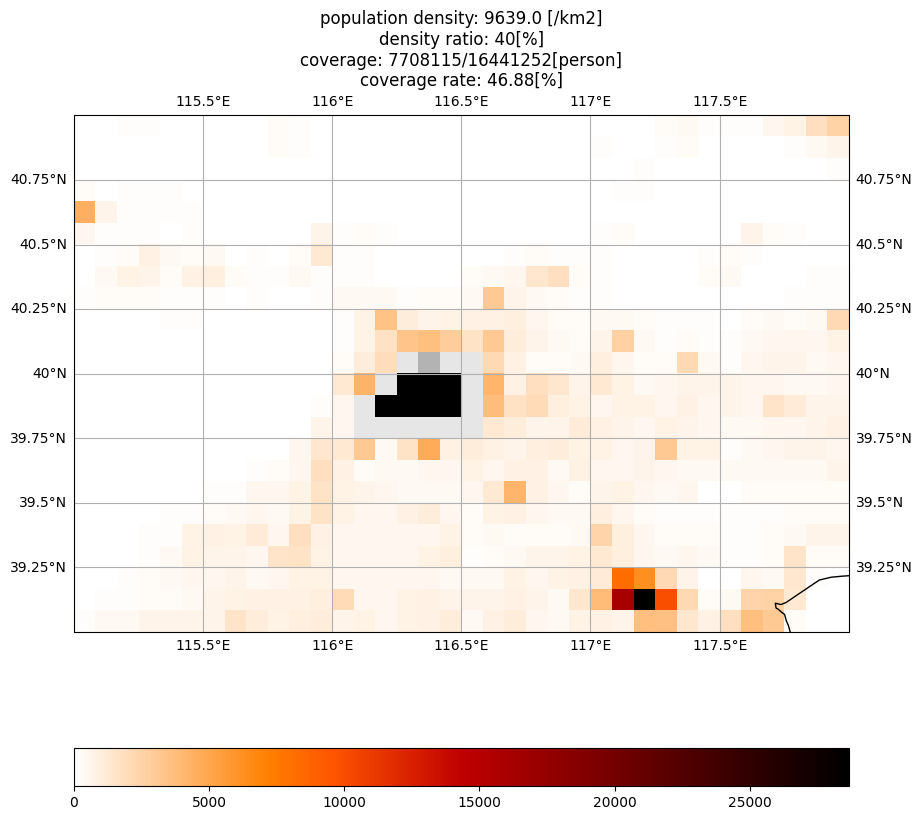

#########################################
explored_pop 7708115.5
true_pop 16441252.0
coverage 0.46882776932073056
city_mask 7.0
Beijing
#########################################


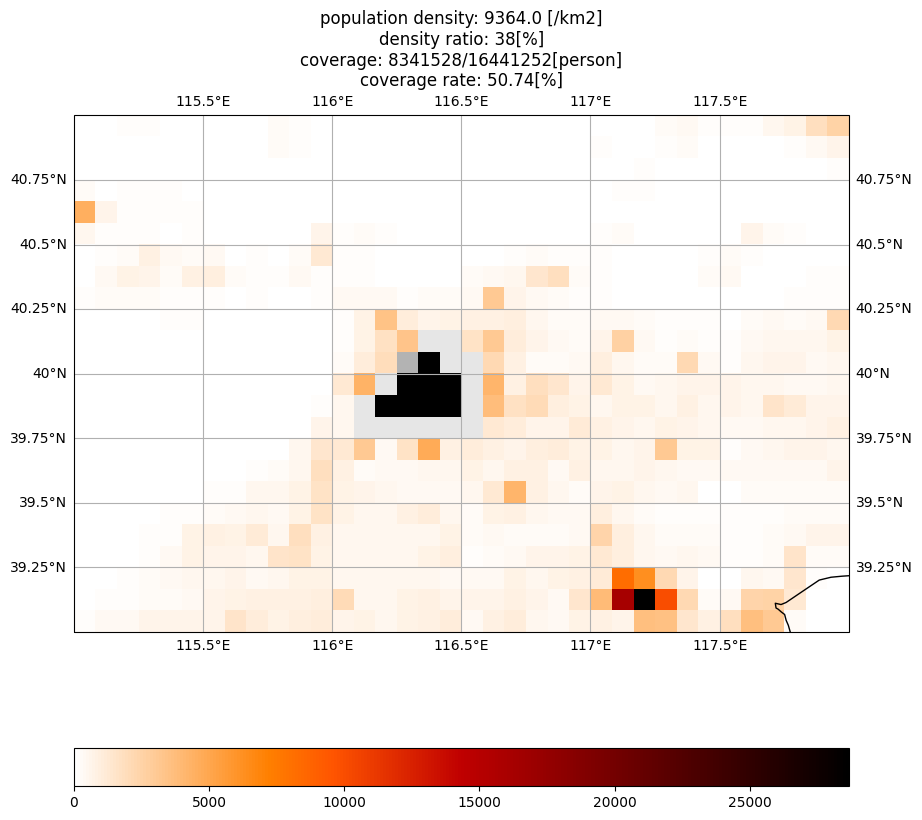

#########################################
explored_pop 8341528.5
true_pop 16441252.0
coverage 0.5073536066474743
city_mask 8.0
Beijing
#########################################


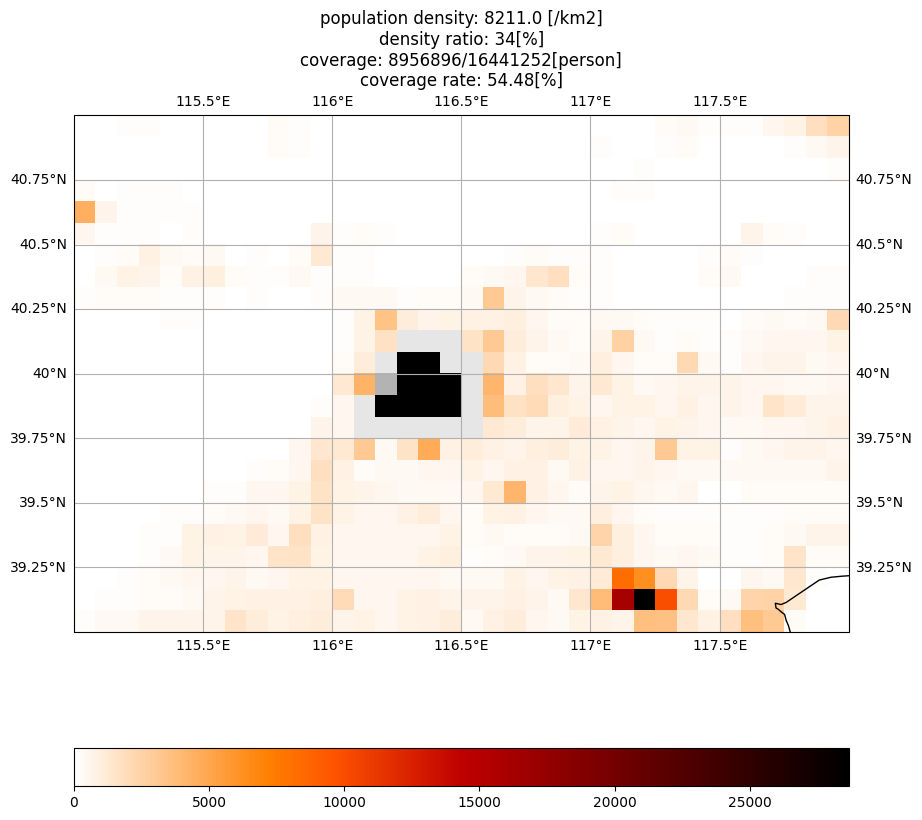

#########################################
explored_pop 8956896.0
true_pop 16441252.0
coverage 0.5447818694099452
city_mask 9.0
Beijing
#########################################


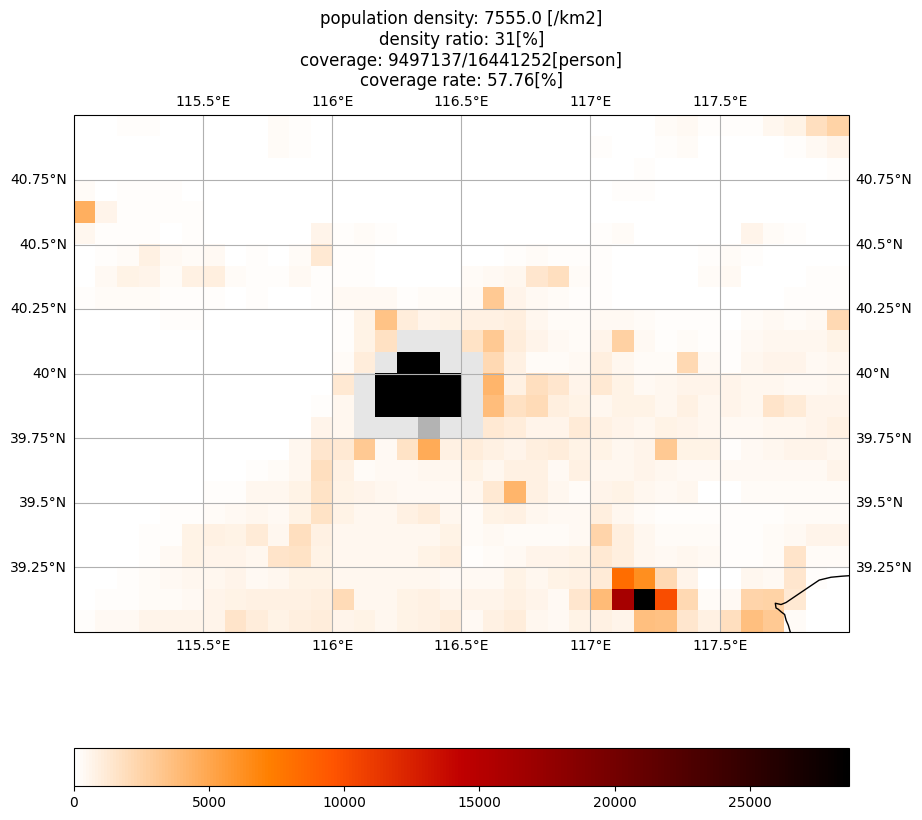

#########################################
explored_pop 9497137.0
true_pop 16441252.0
coverage 0.5776407417148037
city_mask 10.0
Beijing
#########################################


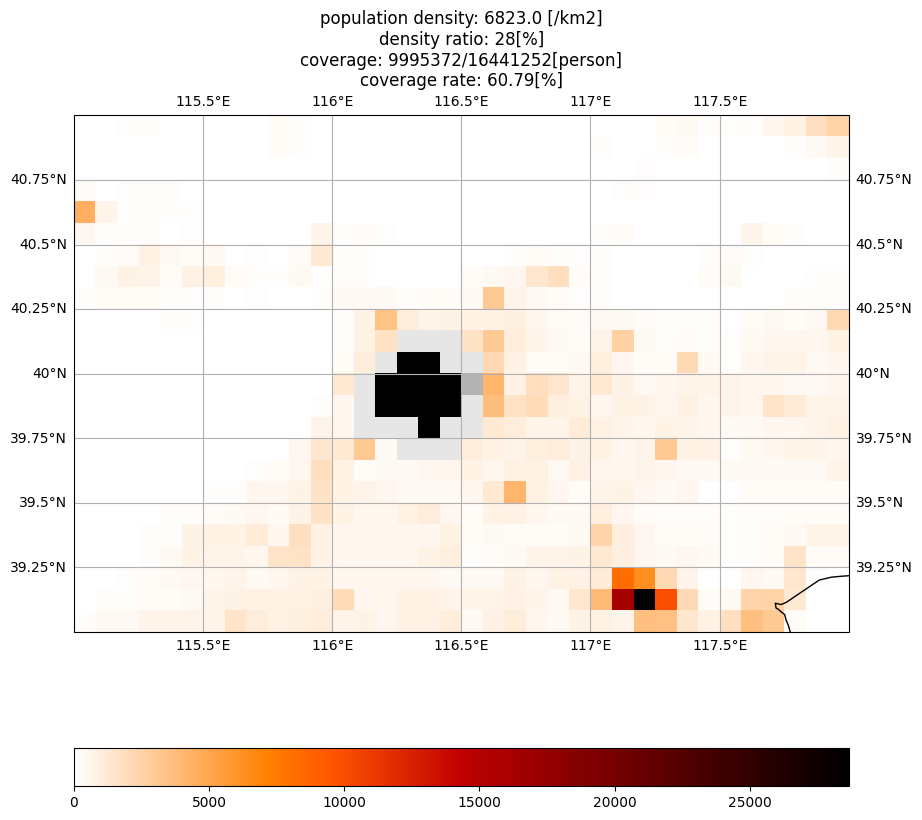

#########################################
explored_pop 9995372.0
true_pop 16441252.0
coverage 0.6079446991019906
city_mask 11.0
Beijing
#########################################


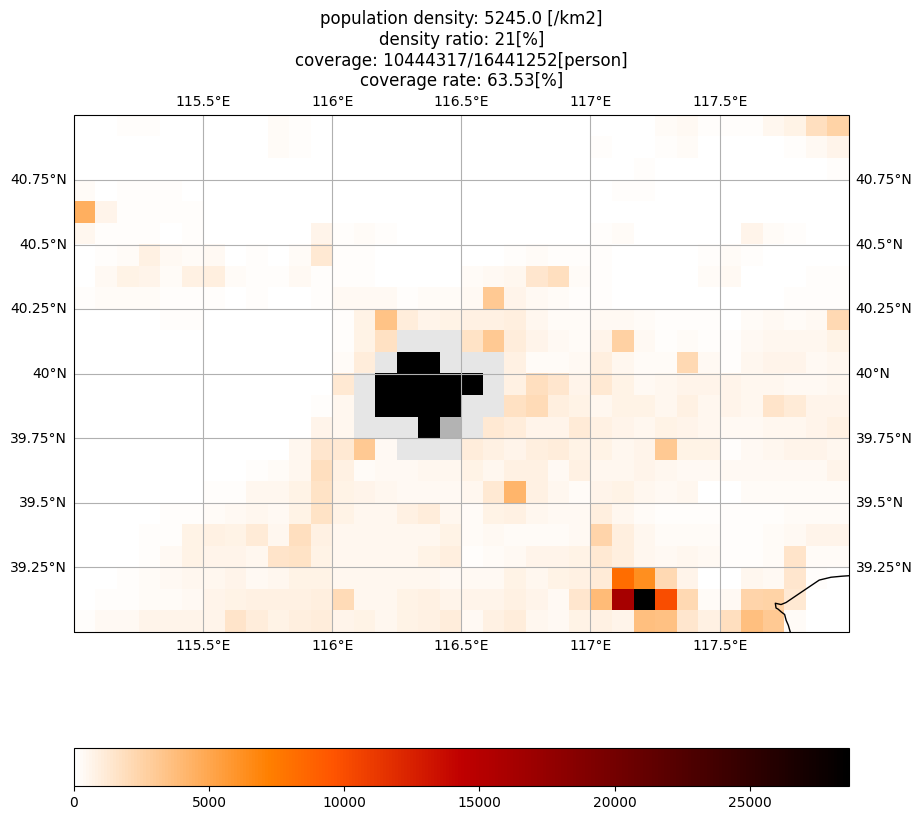

#########################################
explored_pop 10444317.0
true_pop 16441252.0
coverage 0.6352507096174914
city_mask 12.0
Beijing
#########################################


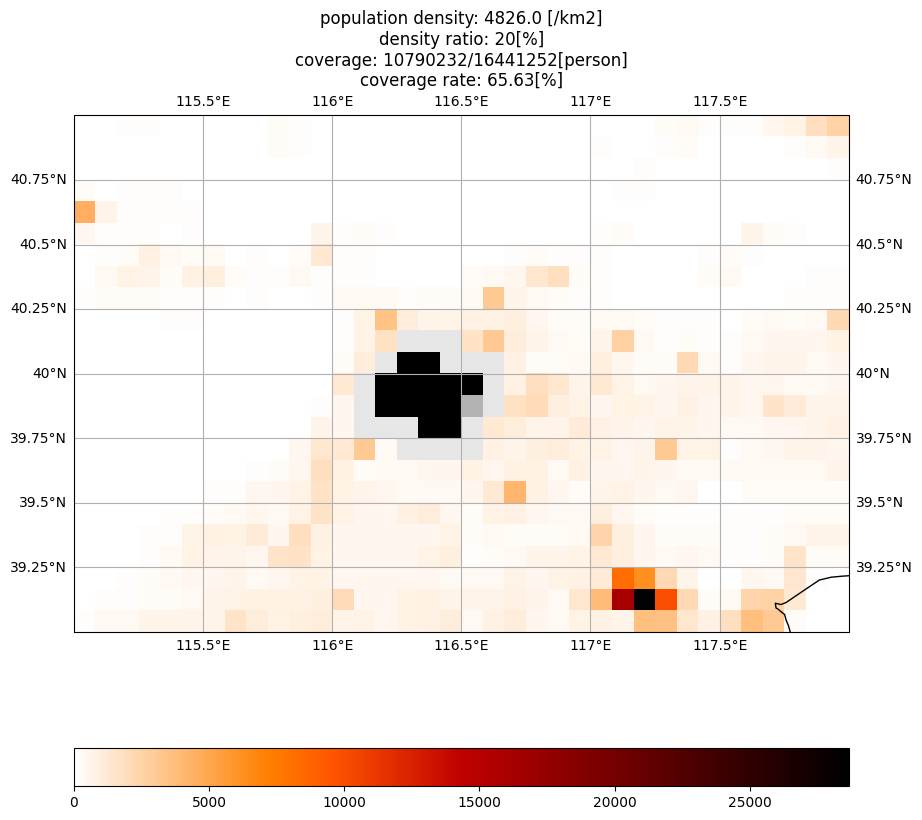

#########################################
explored_pop 10790232.0
true_pop 16441252.0
coverage 0.6562901657367699
city_mask 13.0
Beijing
#########################################


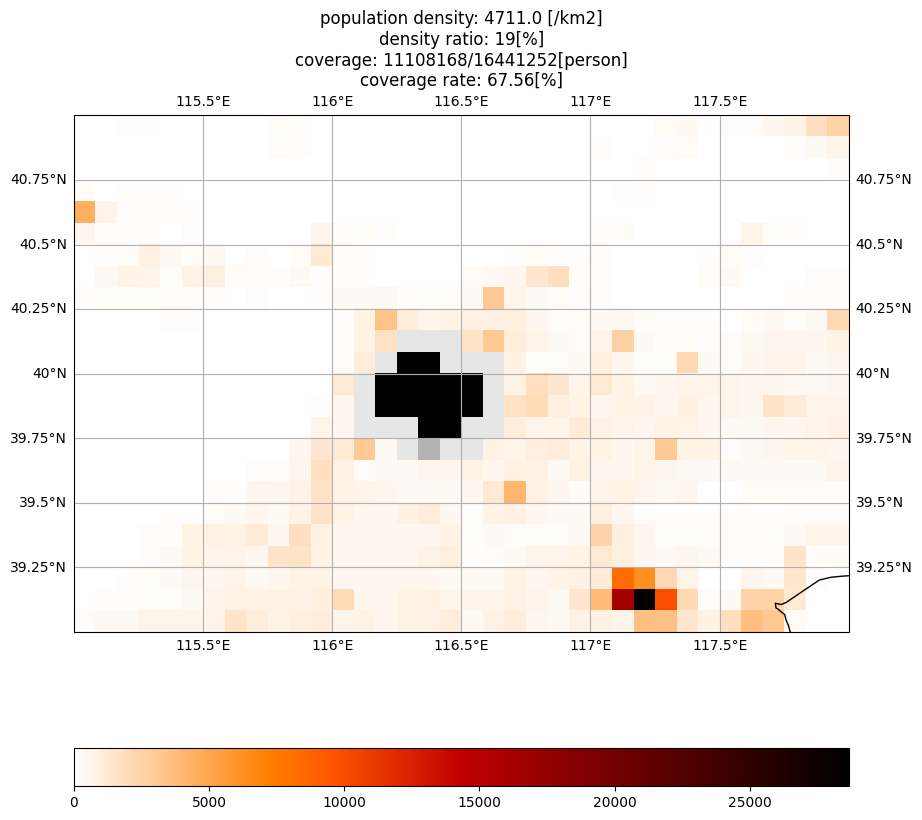

#########################################
explored_pop 11108168.0
true_pop 16441252.0
coverage 0.6756278658097328
city_mask 14.0
Beijing
#########################################


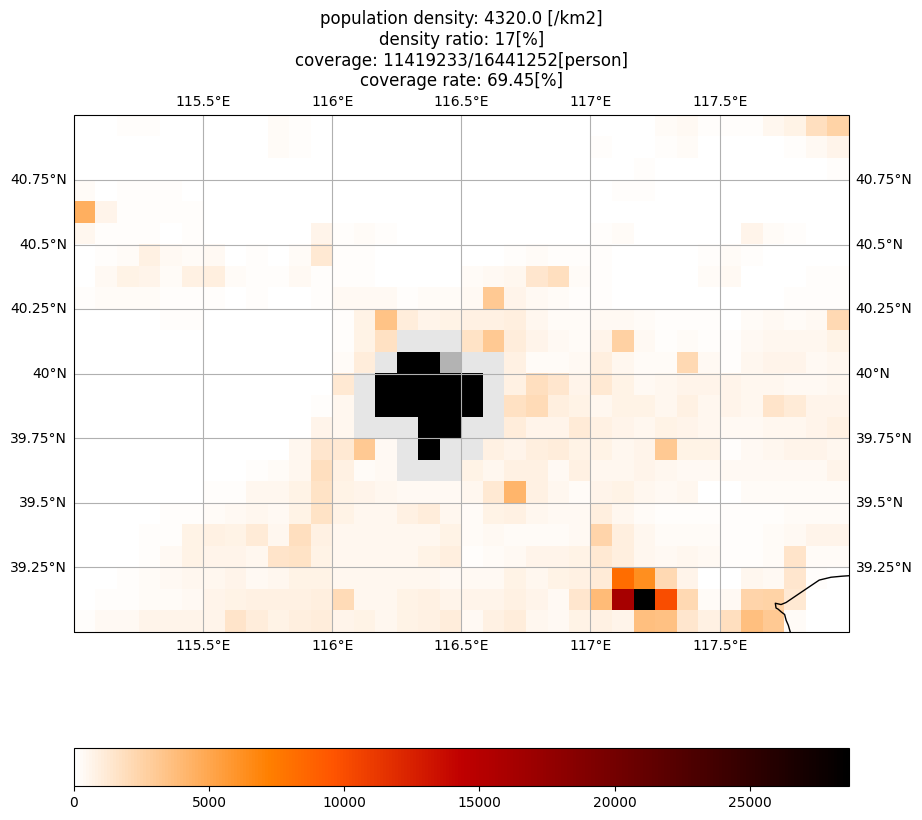

#########################################
explored_pop 11419233.0
true_pop 16441252.0
coverage 0.6945476536701706
city_mask 15.0
Beijing
#########################################


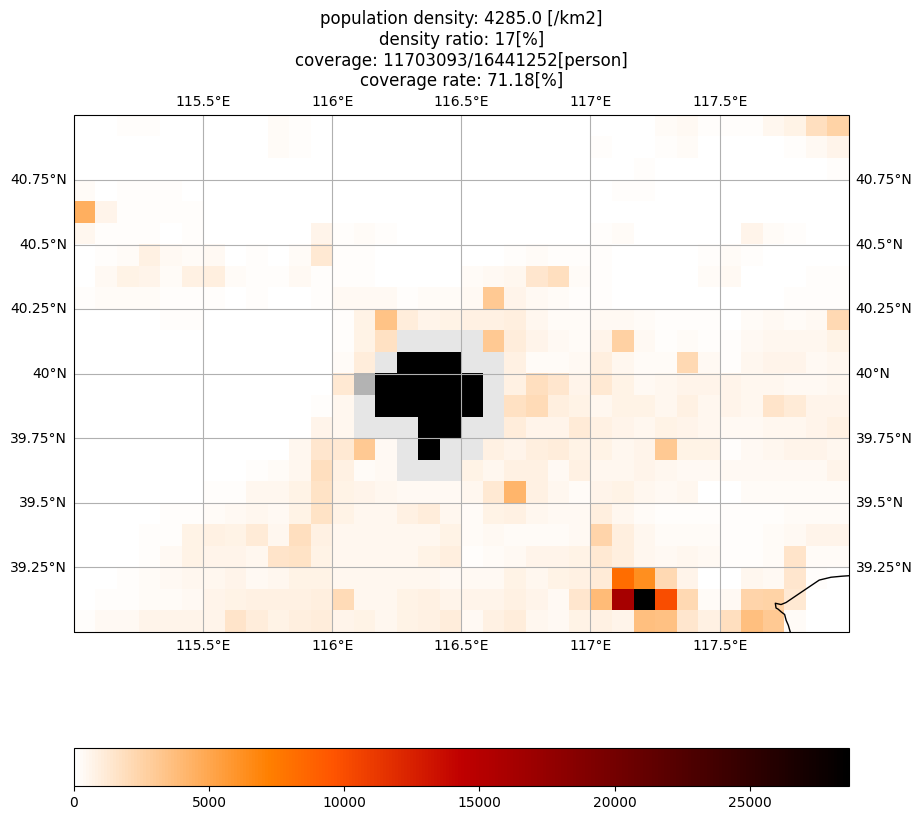

#########################################
explored_pop 11703093.0
true_pop 16441252.0
coverage 0.7118127621911032
city_mask 16.0
Beijing
#########################################


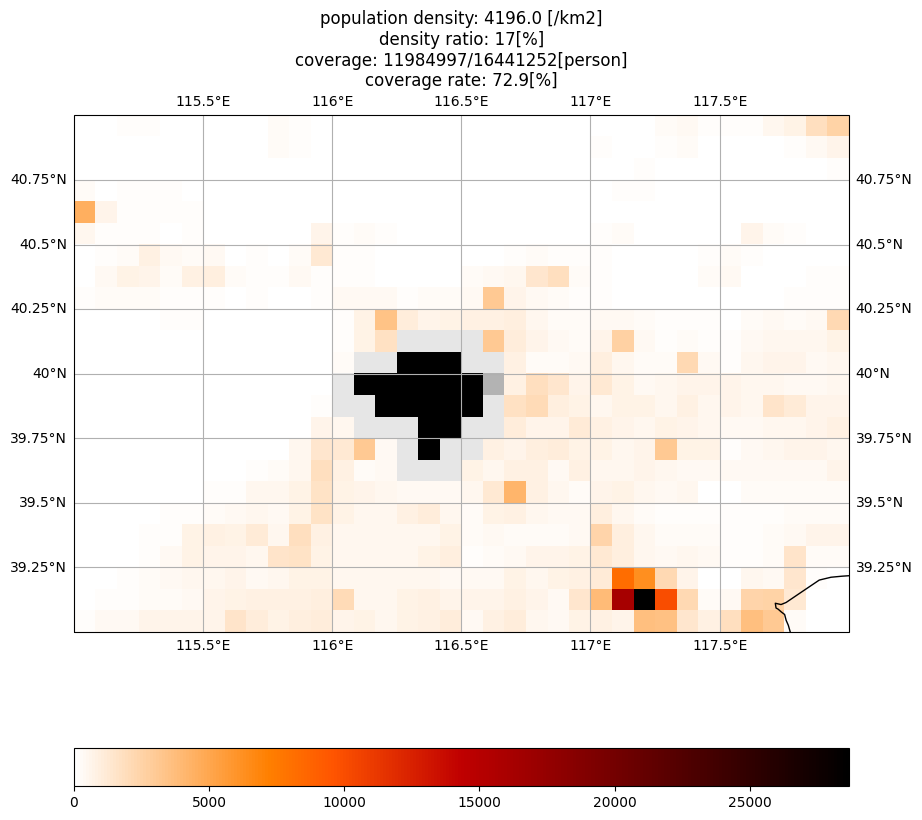

#########################################
explored_pop 11984997.0
true_pop 16441252.0
coverage 0.7289589016700188
city_mask 17.0
Beijing
#########################################


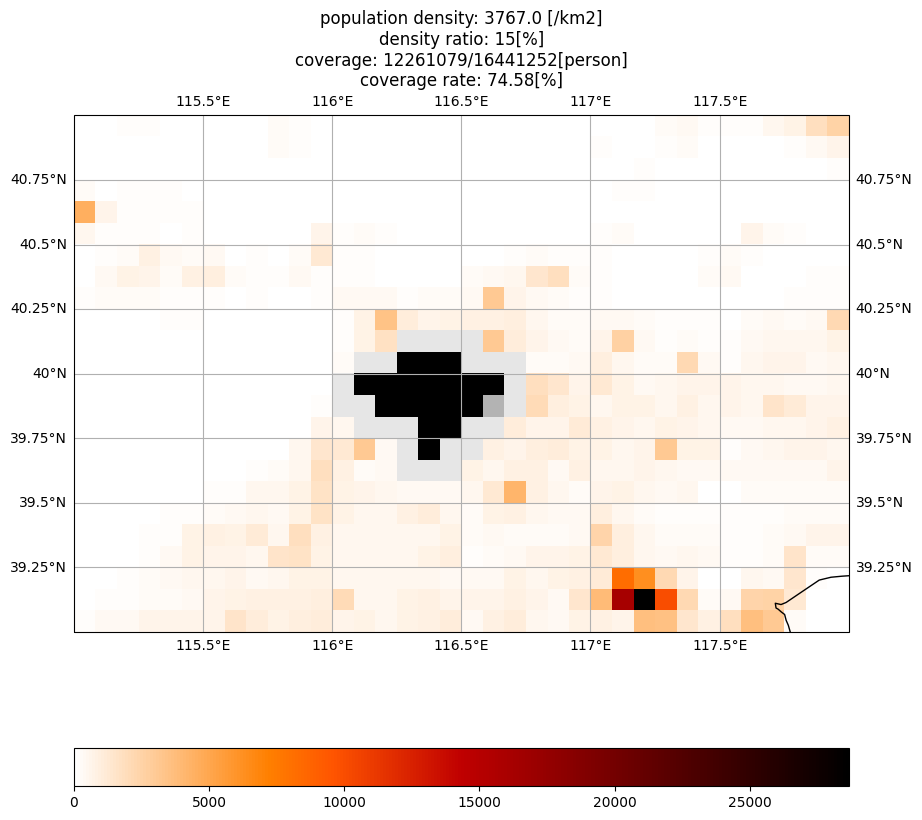

#########################################
explored_pop 12261079.0
true_pop 16441252.0
coverage 0.7457509318633398
city_mask 18.0
Beijing
#########################################


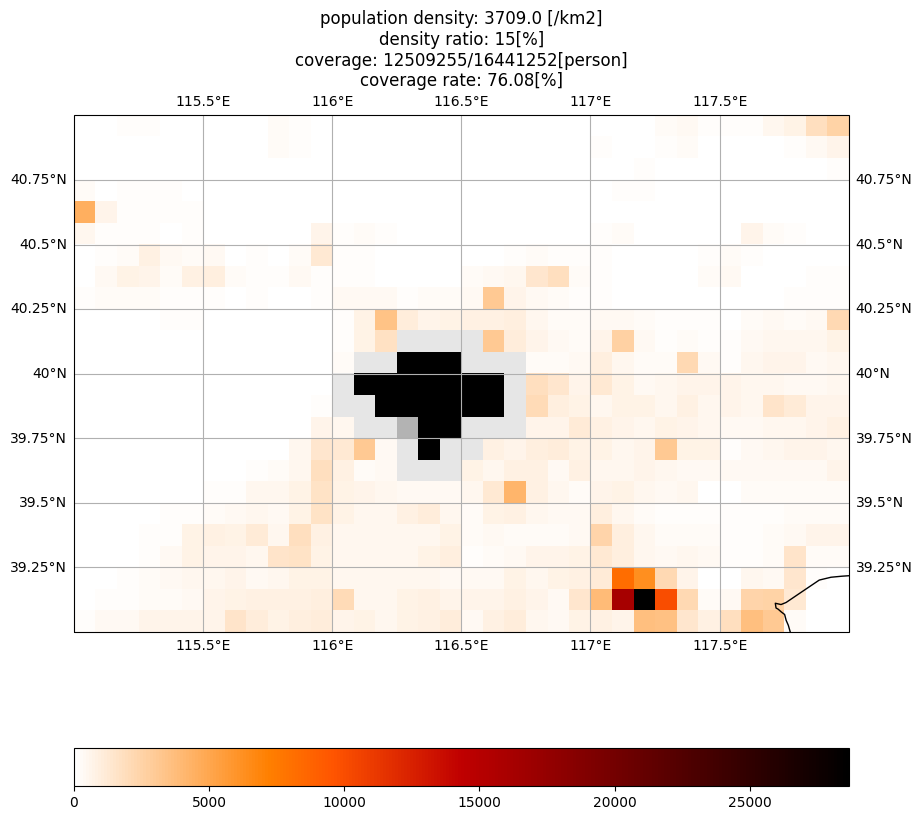

#########################################
explored_pop 12509255.0
true_pop 16441252.0
coverage 0.7608456460615043
city_mask 19.0
Beijing
#########################################


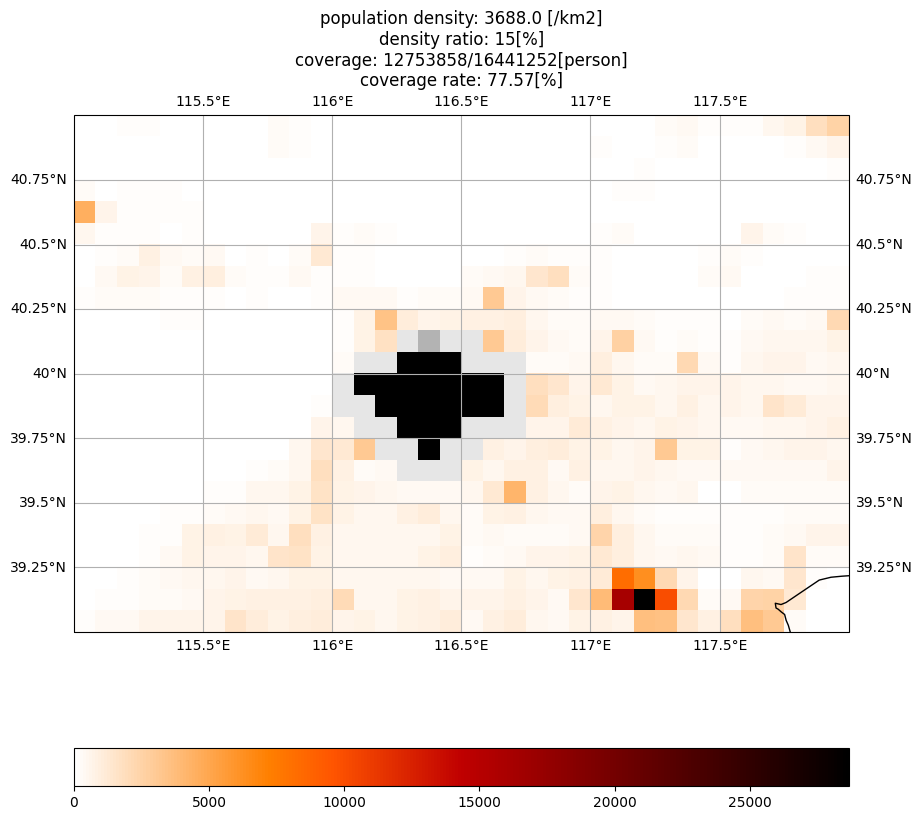

#########################################
explored_pop 12753858.0
true_pop 16441252.0
coverage 0.7757230410433463
city_mask 20.0
Beijing
#########################################


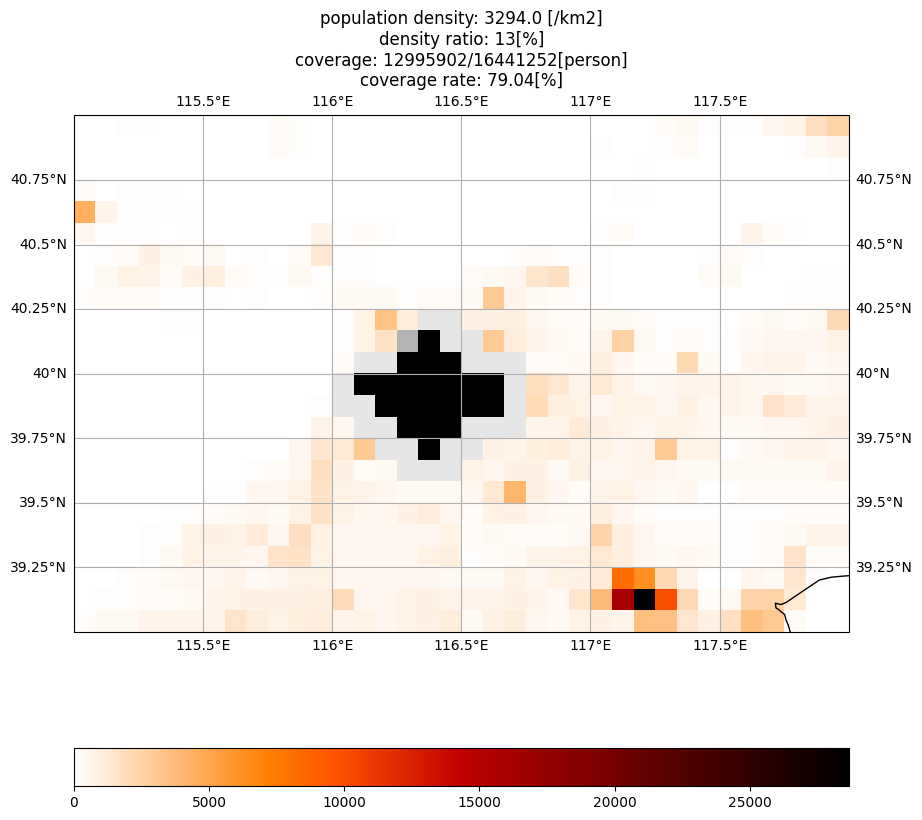

#########################################
explored_pop 12995902.0
true_pop 16441252.0
coverage 0.7904447909441447
city_mask 21.0
Beijing
#########################################


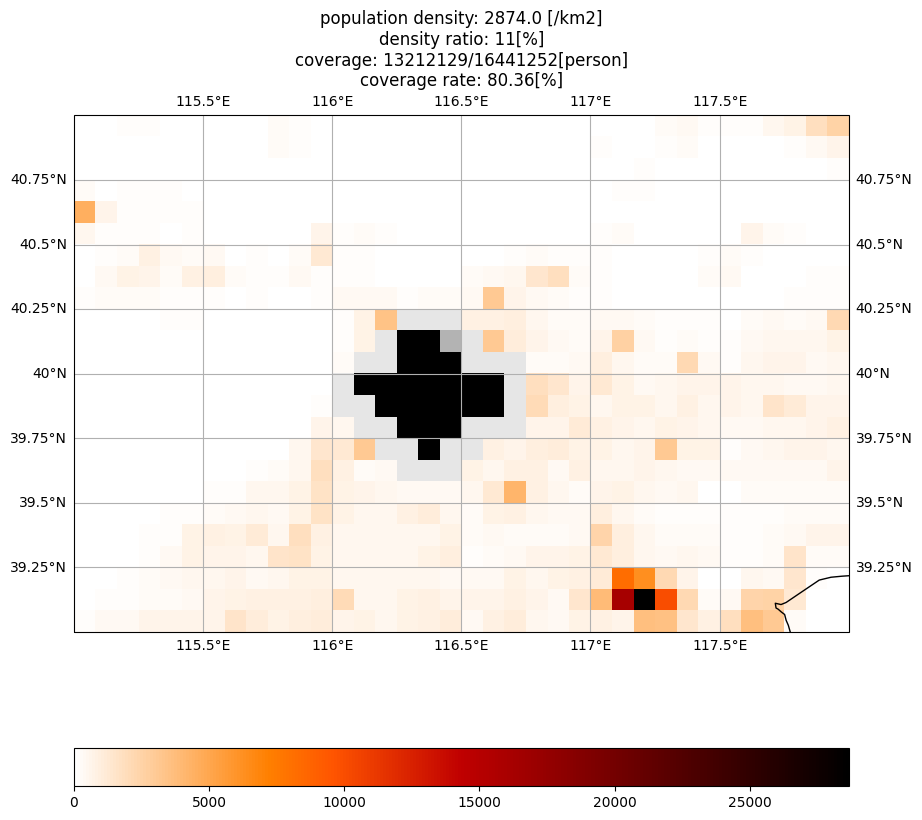

#########################################
explored_pop 13212129.0
true_pop 16441252.0
coverage 0.8035962833000796
city_mask 22.0
Beijing
#########################################
/// stop ///
/// stop ///
/// stop ///
/// stop ///
latest density 2222.592668190029 less than 1/10.0 of initial density 24028.50301623272
/// stop ///
/// stop ///
/// stop ///
/// stop ///


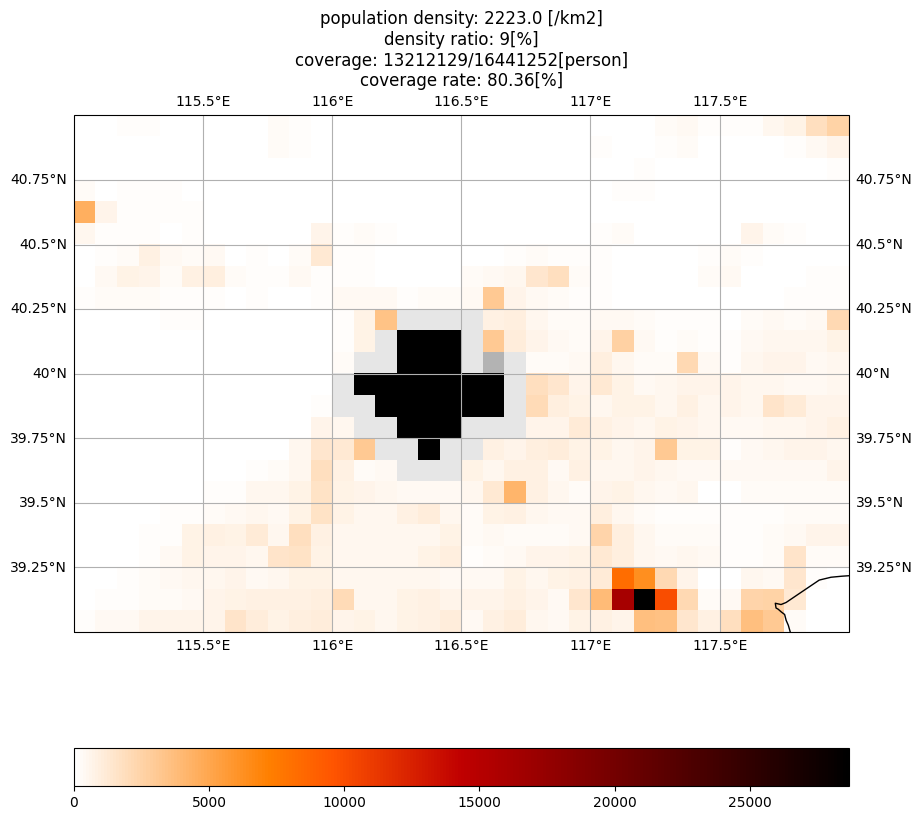

#########################################
explored_pop 13212129.0
true_pop 16441252.0
coverage 0.8035962833000796
city_mask 22.0
Beijing
#########################################


In [143]:
# execute
a, b, upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent, city_num = geography()
explore_citymask(city_num)